# ✔️ 사전 세팅

In [1]:
!pip install torchinfo torch-fidelity matplotlib gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 603.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install numpy==1.24.4 pandas==1.5.3 scipy==1.10.1 --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 197.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 248.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 251.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 228.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 289.6 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1

In [51]:
import os
import random
import re
import sys
import urllib.request
import warnings
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

from gensim.models import FastText, Word2Vec

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

In [2]:
# Warnings 제거
warnings.filterwarnings('ignore')

# Pandas 보기 옵션
pd.set_option('display.max_columns',100)

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


---

# ✔️ 요약

본 실습에서는 **20개의 뉴스 카테고리**로 구성된 텍스트 분류 문제를 해결하기 위해, <br> **LSTM 기반 분류 모델**을 구현하고 성능을 비교하였다. <br>
텍스트는 **소문자화**, **특수문자 제거**, **불용어 제거**를 통해 학습에 적합한 형태로 정제했다.<br><br>

단어 임베딩 방식으로는 **Word2Vec**, **FastText**, **GloVe**를 사용으며,<br>
이후에는 동일한 구조의 BiLSTM 모델을 학습시켰다.<br>
특히, 데이터의 클래스 불균형 문제를 고려하여 CrossEntropyLoss에 **클래스 가중치**를 적용했다.<br><br>

Word2Vec과 FastText 모델은 모두 정확도 **65%**를 기록했으며,<br>
GloVe 모델은 정확도 **68%**로 가장 높은 성능을 보였다.<br>
이는 GloVe가 대규모 말뭉치를 기반으로 **일반화된 표현을 사전학습**했기 때문이라고 해석할 수 있을 것이다.

---

# ✔️ **데이터 설명**

**1) 목적** <br>
본 실습의 목적은 **18,846개의 뉴스 문서를 20개의 주제 카테고리로 분류**하는 딥러닝 모델을 구현하는 것이다.<br>
텍스트 데이터를 입력으로 받아 뉴스의 카테고리를 예측하며, 다양한 임베딩 기법을 적용해 분류 성능을 비교한다.




<br>

**2) 데이터셋** <br>
사용한 데이터는 총 18,846개의 뉴스 문서로 구성된 **20 Newsgroups 데이터셋**으로,<br>
각 문서는 컴퓨터, 스포츠, 정치, 종교 등 20개의 서로 다른 주제 중 하나에 해당한다.<br>
본 실습에서는 **헤더, 인용문, 서명을 제외**한 버전을 사용하였다.

---

# ✔️ **1. 데이터 분석**

### **데이터 불러오기**

In [129]:
news_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [130]:
print(f"총 문서 수: {len(news_data.data)}")
print(f"총 라벨 수: {len(news_data.target)}")

총 문서 수: 18846
총 라벨 수: 18846


headers, footers, quotes를 제거하여 뉴스 데이터를 다운받았으며, <br>
사용할 데이터의 수는 총 18,846개이다.

### **데이터 keys 확인**

In [131]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


뉴스 데이터에서 사용할 keys는 다음과 같다.
- ```data```: 뉴스 기사 텍스트
- ```filenames```: 파일 경로
- ```target_names```: 뉴스 카테고리명
- ```target```: 뉴스 카테고리명과 매칭된 숫자
- ```DESCR```: 데이터 설명
<br><br>

위 key들의 형태를 살펴보기 위해 0번 데이터를 예시로 출력해보았다.

In [132]:
idx = 0

print("[본문 내용 - data]")
print(news_data.data[idx])
print("\n[파일 경로 - filenames]")
print(news_data.filenames[idx])
print("\n[정답 라벨 이름 - target_names]")
print(news_data.target_names[news_data.target[idx]])
print("\n[정답 라벨 번호 - target]")
print(news_data.target[idx])
print("\n[데이터셋 설명 - DESCR] (일부)")
print(news_data.DESCR[:500], "...")

[본문 내용 - data]


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!



[파일 경로 - filenames]
/root/scikit_learn_data/20news_home/20news-bydate-test/rec.sport.hockey/54367

[정답 라벨 이름 - target_names]
rec.sport.hockey

[정답 라벨 번호 - target]
10

[데이터셋 설명 - DESCR] (일부)
.. _20newsgroups_dataset:

The 20 newsgroups text dataset
-----------------------

### **뉴스 카테고리 확인**

뉴스 데이터의 20개의 카테고리 목록은 다음과 같다.

In [133]:
news_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

| 번호 | 카테고리 (영문)            | 카테고리 (한글)         |
|------|----------------------------|--------------------------|
|  0   | alt.atheism                | 무신론                   |
|  1   | comp.graphics              | 컴퓨터 그래픽            |
|  2   | comp.os.ms-windows.misc   | 윈도우 운영체제 기타     |
|  3   | comp.sys.ibm.pc.hardware  | IBM PC 하드웨어          |
|  4   | comp.sys.mac.hardware     | Mac 하드웨어             |
|  5   | comp.windows.x            | X 윈도우 시스템          |
|  6   | misc.forsale              | 중고 거래                |
|  7   | rec.autos                 | 자동차                   |
|  8   | rec.motorcycles           | 오토바이                 |
|  9   | rec.sport.baseball        | 야구                     |
| 10   | rec.sport.hockey          | 하키                     |
| 11   | sci.crypt                 | 암호학                   |
| 12   | sci.electronics           | 전자공학                 |
| 13   | sci.med                   | 의학                     |
| 14   | sci.space                 | 우주                     |
| 15   | soc.religion.christian   | 기독교                   |
| 16   | talk.politics.guns        | 총기 정치                |
| 17   | talk.politics.mideast     | 중동 정치                |
| 18   | talk.politics.misc        | 기타 정치                |
| 19   | talk.religion.misc        | 기타 종교                |


### **카테고리별 데이터 수 확인**

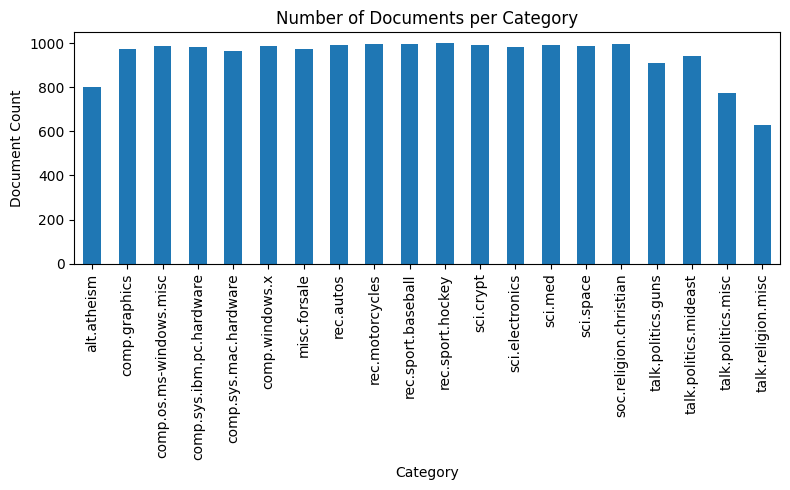

In [134]:
categories = [news_data.target_names[i] for i in news_data.target]
df = pd.DataFrame({'category': categories})

# 카테고리별 개수
category_counts = df['category'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title("Number of Documents per Category")
plt.xlabel("Category")
plt.ylabel("Document Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

각 뉴스 카테고리에 속하는 **데이터들의 개수는 800~1000개** 사이로, 데이터 분포가 전반적으로 균형적이지만<br>
talk.religion.misc와 같은 특정 클래스의 수의 데이터 개수는 적은 편이다. <br>
추후 클래스 가중치를 적용할 필요도 있을 것 같다.

### **데이터 글자 수 확인**

In [135]:
doc_lengths = [len(text) for text in news_data.data]
length_stats = pd.Series(doc_lengths).describe()
display(length_stats.to_frame(name="char_length_stats"))

,char_length_stats
count,18846.000000
mean,1169.667516
std,3858.748875
min,0.000000
25%,234.000000
50%,489.000000
75%,979.000000
max,158791.000000


뉴스 한 개의 **평균 글자 수는 1160자**이다. <br>
또한, 0글자와 15만자라는 이상치도 존재한다.

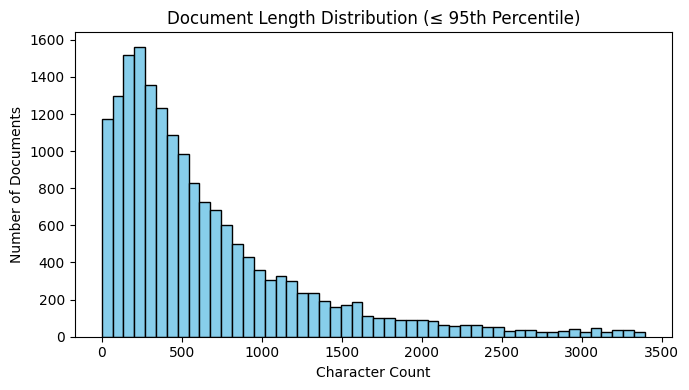

In [136]:
# 95%까지 시각화
threshold = np.percentile(doc_lengths, 95)
filtered_lengths = [l for l in doc_lengths if l <= threshold]

plt.figure(figsize=(7, 4))
plt.hist(filtered_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Document Length Distribution (≤ 95th Percentile)")
plt.xlabel("Character Count")
plt.ylabel("Number of Documents")
plt.tight_layout()
plt.show()

95%까지 시각화를 하여 글자수 분포를 확인해보았다. <br>
글자수가 **500자 이하인 뉴스가 많은 편**이다.

---

# ✔️ **2. 데이터 전처리**

### **글자 수 이상치 제거**

In [137]:
texts = news_data.data
labels = news_data.target

# 각 뉴스의 글자 수 계산
doc_lengths = [len(text) for text in texts]

# 95% 분위수 기준 계산
length_90th = np.percentile(doc_lengths, 95)
print(f"95% 기준: {length_90th:.0f}")

# 조건에 맞는 뉴스 개수
num_empty = sum([1 for l in doc_lengths if l == 0])
num_above_90 = sum([1 for l in doc_lengths if l > length_90th])

print(f"글자 수가 0인 문서 개수: {num_empty}")
print(f"글자 수가 90% 기준 이상인 뉴스 개수: {num_above_90}")

filtered = [
    (text, label) for text, length, label in zip(texts, doc_lengths, labels)
    if (length > 0 and length <= length_90th)
]

texts_filtered, labels_filtered = zip(*filtered)
print(f"데이터 개수: {len(texts_filtered)}")

95% 기준: 3397
글자 수가 0인 문서 개수: 380
글자 수가 90% 기준 이상인 뉴스 개수: 943
데이터 개수: 17523


글자 수가 0자인 뉴스와 3397자 이상인 뉴스는 **이상치로 판단**해 제거했다. <br>
제거한 뉴스 데이터 수는 943개이다.

### **데이터 클리닝**

In [138]:
nltk.download('stopwords') # the, is, and 리스트
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text) # 특수문자, 숫자 제거 (알파벳과 공백만 남김)
    tokens = text.split() # 불용어 제거
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

tokenized_texts = [clean_text(text) for text in texts_filtered]

# 결과 예시
for i in range(3):
    print(f"{i+1}번째 문서 토큰:", tokenized_texts[i][:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1번째 문서 토큰: ['sure', 'bashers', 'pens', 'fans', 'pretty', 'confused', 'lack', 'kind', 'posts', 'recent']
2번째 문서 토큰: ['brother', 'market', 'highperformance', 'video', 'card', 'supports', 'vesa', 'local', 'bus', 'mb']
3번째 문서 토큰: ['finally', 'said', 'dream', 'mediterranean', 'new', 'area', 'greater', 'years', 'like', 'holocaust']


전체 문서를 **소문자로 변환**한 뒤, 알파벳과 공백을 제외한 **특수문자와 숫자를 제거**하였다. <br>
이후 NLTK에서 제공하는 **영어 불용어(stopwords)** 리스트를 활용하여 의미 없는 단어들을 제거하였고, <br>
남은 단어들을 공백 기준으로 나누어 **토큰화된 형태의 리스트**로 변환하였다.

### **데이터 분할**

In [139]:
X = tokenized_texts
y = labels_filtered

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

전처리가 완료된 **텍스트 데이터를 입력(X)**, 해당 **카테고리 라벨을 출력(y)**로 설정했다. <br>
그리고 전체 데이터의 **80%**를 학습용, **20%**를 테스트용으로 분할하였다.

데이터 분할 이후, 단어 임베딩 방식에 따라 실험을 세 가지로 나누어 진행했다. <br><br>
각 실험에서는 동일한 학습/테스트 데이터를 사용하되, <br>
**Word2Vec, FastText, GloVe** 중 하나의 임베딩 방법을 적용하여 단어를 벡터로 표현하고,<br>
이후 동일한 구조의 LSTM 기반 분류 모델을 학습시켰다.

---

# ✔️ **3. Word2vec**

### **Word2Vec 학습**

In [63]:
VECTOR_SIZE = 200

w2v_model = Word2Vec(
    sentences=X_train,
    vector_size=VECTOR_SIZE, # 백터 크기
    window=5, # 앞뒤로 고려할 단어 개수
    min_count=2, # 2번 이상 등장한 단어만 학습에 사용
    workers=4,
    sg=1 # Skip-Gram
)

In [64]:
word2idx = {"<PAD>": 0, "<UNK>": 1}

embedding_matrix = [
    np.zeros(VECTOR_SIZE),  # PAD
    np.random.randn(VECTOR_SIZE)  # UNK
]

for i, word in enumerate(w2v_model.wv.index_to_key):
    word2idx[word] = i + 2
    embedding_matrix.append(w2v_model.wv[word])

embedding_matrix = np.array(embedding_matrix)

학습된 단어 벡터는 ```<PAD>```와 ```<UNK>``` 토큰을 포함하도록 변환했다.

### **데이터셋 클래스 정의**

In [65]:
class TextEmbeddingDataset(Dataset):
    def __init__(self, texts, labels, word2idx, max_len):
        self.texts = texts
        self.labels = labels
        self.word2idx = word2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = self.texts[idx]
        encoded = [self.word2idx.get(word, self.word2idx["<UNK>"]) for word in tokens]

        if len(encoded) < self.max_len:
            encoded += [self.word2idx["<PAD>"]] * (self.max_len - len(encoded))
        else:
            encoded = encoded[:self.max_len]

        return torch.tensor(encoded, dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

### **데이터로더 생성**

In [66]:
MAX_LEN = 280
BATCH_SIZE = 64

train_dataset = TextEmbeddingDataset(X_train, y_train, word2idx, MAX_LEN)
test_dataset = TextEmbeddingDataset(X_test, y_test, word2idx, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

모델에 입력할 문서 길이를 최대 280개의 단어로 제한했다. <br>
이를 통해 **문서 길이가 280자보다 짧으면** 남는 부분은 ```<PAD>``` 토큰(=0)으로 채워 길이가 280이 되도록 한다. <br>
반면 **문서 길이가 280자보다 길면** 오버되는 부분은 앞에서부터 280개만 자르고 나머지는 버리게 된다.

### **LSTM 모델 정의**

In [67]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, output_dim, num_layers, dropout):
        super(LSTMClassifier, self).__init__()

        vocab_size, embedding_dim = embedding_matrix.shape

        # 1. 임베딩 레이어
        self.embedding = nn.Embedding.from_pretrained(
            torch.tensor(embedding_matrix, dtype=torch.float).to(device),
            freeze=False
        )

        # 2. LSTM
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True,
            bidirectional=True
        )

        # 3. FC 레이어
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)

        # 양방향
        forward_hidden = hidden[-2]
        backward_hidden = hidden[-1]
        combined = torch.cat((forward_hidden, backward_hidden), dim=1)

        out = self.fc(combined)
        return out

모델은 임베딩 레이어, 양방향 LSTM, FC 레이어로 구성했다.<br>
특히 **LSTM은 양방향 구조로 설정**하여, 입력 시퀀스 앞과 뒤 양쪽 방향에서 학습할 수 있도록 했다. <br> 이를 통해 뉴스의 문맥을 더욱 잘 파악할 수 있을 것이다.

In [68]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMClassifier(
    embedding_matrix=embedding_matrix,
    hidden_dim=128,
    output_dim=len(set(y_train)),
    num_layers=2,
    dropout=0.5
).to(device)

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_tensor = torch.FloatTensor(class_weights).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

클래스 불균형을 완화하기 위해 **클래스 가중치**를 적용했다. <br>
이를 통해 상대적으로 적은 수의 데이터를 가진 카테고리도 균형있게 반영될 것이다.

### **LSTM 모델 학습**

In [69]:
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f}")

[Epoch 1] Loss: 2.2653
[Epoch 2] Loss: 1.6330
[Epoch 3] Loss: 1.2837
[Epoch 4] Loss: 0.9815
[Epoch 5] Loss: 0.7815
[Epoch 6] Loss: 0.5812
[Epoch 7] Loss: 0.4438
[Epoch 8] Loss: 0.3636
[Epoch 9] Loss: 0.2476
[Epoch 10] Loss: 0.2082
[Epoch 11] Loss: 0.1717
[Epoch 12] Loss: 0.1378
[Epoch 13] Loss: 0.1268
[Epoch 14] Loss: 0.1018
[Epoch 15] Loss: 0.0883
[Epoch 16] Loss: 0.0817
[Epoch 17] Loss: 0.0743
[Epoch 18] Loss: 0.0796
[Epoch 19] Loss: 0.0824
[Epoch 20] Loss: 0.0682


### **LSTM 모델 평가**

모델의 성능 평가는 테스트 데이터에 대해 **정확도(Accuracy)**, **정밀도(Precision)**, **재현율(Recall)**, **F1-score** 지표를 사용했다.

In [70]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# 성능 평가
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.55      0.39      0.45       148
           1       0.55      0.72      0.62       181
           2       0.69      0.58      0.63       185
           3       0.57      0.59      0.58       191
           4       0.67      0.59      0.63       187
           5       0.77      0.71      0.74       190
           6       0.65      0.75      0.70       189
           7       0.59      0.75      0.66       187
           8       0.73      0.61      0.66       195
           9       0.72      0.74      0.73       187
          10       0.87      0.85      0.86       185
          11       0.84      0.70      0.76       179
          12       0.58      0.56      0.57       190
          13       0.71      0.75      0.73       183
          14       0.60      0.68      0.64       180
          15       0.73      0.56      0.63       175
          16       0.57      0.61      0.59       166
          17       0.85    

Word2vec를 사용했을 때 전체 정확도는 **65%**였다. <br>
클래스별로 살펴보면, 데이터 수가 많은 클래스에서는 **상대적으로 높은 F1-score**를 보였으며(class 10, class 5 등),<br>
반면 데이터 수가 적은 클래스(class 19 등)에서는 **상대적으로 낮은 F1-score**를 보였다.

🔹🔹🔹 <br>
번외로, **클래스 가중치를 적용하지 않았을 때의 실험**도 따로 진행해보았다. <br>
클래스 가중치를 적용하지 않았을 때의 **전체 정확도는 64%로 1% 낮았다.** <br><br>
클래스별 가중치를 적용했을 때, 클래스 17(talk.politics.mideast)의 F1-score는 **+0.06**,<br>
클래스 19(talk.religion.misc)의 F1-score는 **+0.01**로 미세하지만 약간의 성능이 향상됐다.<br>
따라서 해당 결과를 바탕으로 약간의 성능 향상을 보이는 **클래스 가중치를 적용**하기로 최종 결정했다. <br>
🔹🔹🔹

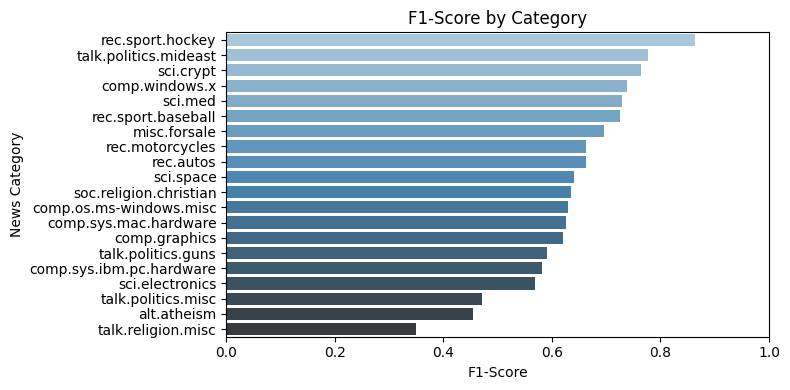

In [71]:
precision, recall, f1, support = precision_recall_fscore_support(
    all_labels, all_preds, labels=range(len(news_data.target_names))
)

df_report = pd.DataFrame({
    'Category': news_data.target_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

plt.figure(figsize=(8, 4))
df_plot = df_report.sort_values('F1-Score', ascending=False)

sns.barplot(x='F1-Score', y='Category', data=df_plot, palette='Blues_d')
plt.title('F1-Score by Category')
plt.xlabel('F1-Score')
plt.ylabel('News Category')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

데이터 분석 단계에서 우려했던 것처럼 데이터 수가 적은 카테고리의 F1-Score 점수가 낮았다.

In [72]:
target_names = news_data.target_names

# 예측 vs 정답
df_result = pd.DataFrame({
    'True Label': [target_names[y] for y in all_labels],
    'Predicted':  [target_names[y] for y in all_preds]
})

print(df_result.head(20))

                  True Label                 Predicted
0         talk.politics.misc        talk.politics.guns
1               misc.forsale              misc.forsale
2                    sci.med                 sci.space
3                    sci.med                   sci.med
4            sci.electronics     comp.sys.mac.hardware
5                  sci.crypt                 sci.crypt
6             comp.windows.x            comp.windows.x
7     soc.religion.christian    soc.religion.christian
8              comp.graphics             comp.graphics
9           rec.sport.hockey          rec.sport.hockey
10        rec.sport.baseball        rec.sport.baseball
11               alt.atheism               alt.atheism
12  comp.sys.ibm.pc.hardware     comp.sys.mac.hardware
13        rec.sport.baseball              misc.forsale
14        rec.sport.baseball                   sci.med
15             comp.graphics             comp.graphics
16           rec.motorcycles           rec.motorcycles
17        

모델이 예측한 카테고리와 실제 정답을 비교해보았을 때의 결과는 위와 같다.

---

# ✔️ **4. FastText**

Word2vec와 코드 구성이 유사해서 구체적인 설명은 생략한다.


### **FastText 학습**

In [107]:
VECTOR_SIZE = 200

fasttext_model = FastText(
    sentences=X_train,
    vector_size=VECTOR_SIZE,
    window=5,
    min_count=2,
    workers=4,
    sg=1
)

In [108]:
word2idx = {"<PAD>": 0, "<UNK>": 1}
embedding_matrix = [
    np.zeros(VECTOR_SIZE),
    np.random.randn(VECTOR_SIZE)
]

for i, word in enumerate(fasttext_model.wv.index_to_key):
    word2idx[word] = i + 2
    embedding_matrix.append(fasttext_model.wv[word])

embedding_matrix = np.array(embedding_matrix)

### **데이터셋 클래스 정의**

In [109]:
class TextEmbeddingDataset(Dataset):
    def __init__(self, texts, labels, word2idx, max_len):
        self.texts = texts
        self.labels = labels
        self.word2idx = word2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = self.texts[idx]
        encoded = [self.word2idx.get(word, word2idx["<UNK>"]) for word in tokens]
        if len(encoded) < self.max_len:
            encoded += [word2idx["<PAD>"]] * (self.max_len - len(encoded))
        else:
            encoded = encoded[:self.max_len]
        return torch.tensor(encoded, dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

### **데이터로더 생성**

In [110]:
MAX_LEN = 280
BATCH_SIZE = 64

train_dataset = TextEmbeddingDataset(X_train, y_train, word2idx, MAX_LEN)
test_dataset = TextEmbeddingDataset(X_test, y_test, word2idx, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### **LSTM 모델 정의**

In [111]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, output_dim, num_layers, dropout):
        super(LSTMClassifier, self).__init__()

        vocab_size, embedding_dim = embedding_matrix.shape

        # 1. 임베딩 레이어
        self.embedding = nn.Embedding.from_pretrained(
            torch.tensor(embedding_matrix, dtype=torch.float).to(device),
            freeze=False
        )

        # 2. LSTM
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True,
            bidirectional=True
        )

        # 3. FC 레이어
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)

        # 양방향
        forward_hidden = hidden[-2]
        backward_hidden = hidden[-1]
        combined = torch.cat((forward_hidden, backward_hidden), dim=1)

        out = self.fc(combined)
        return out

In [112]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMClassifier(
    embedding_matrix=embedding_matrix,
    hidden_dim=128,
    output_dim=len(set(y_train)),
    num_layers=2,
    dropout=0.5
).to(device)

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_tensor = torch.FloatTensor(class_weights).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### **LSTM 모델 학습**

In [113]:
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f}")

[Epoch 1] Loss: 2.3055
[Epoch 2] Loss: 1.7053
[Epoch 3] Loss: 1.3632
[Epoch 4] Loss: 1.0618
[Epoch 5] Loss: 0.8182
[Epoch 6] Loss: 0.6350
[Epoch 7] Loss: 0.4977
[Epoch 8] Loss: 0.3959
[Epoch 9] Loss: 0.3197
[Epoch 10] Loss: 0.2534
[Epoch 11] Loss: 0.1949
[Epoch 12] Loss: 0.1515
[Epoch 13] Loss: 0.1268
[Epoch 14] Loss: 0.1193
[Epoch 15] Loss: 0.1006
[Epoch 16] Loss: 0.0878
[Epoch 17] Loss: 0.0846
[Epoch 18] Loss: 0.0707
[Epoch 19] Loss: 0.0646
[Epoch 20] Loss: 0.0626


### **LSTM 모델 평가**

In [114]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# 성능 평가
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.53      0.43      0.47       148
           1       0.57      0.57      0.57       181
           2       0.63      0.48      0.54       185
           3       0.54      0.62      0.58       191
           4       0.59      0.68      0.63       187
           5       0.77      0.70      0.73       190
           6       0.80      0.64      0.71       189
           7       0.72      0.64      0.68       187
           8       0.60      0.70      0.64       195
           9       0.77      0.77      0.77       187
          10       0.85      0.88      0.86       185
          11       0.82      0.68      0.74       179
          12       0.55      0.58      0.56       190
          13       0.84      0.77      0.80       183
          14       0.58      0.69      0.63       180
          15       0.79      0.66      0.72       175
          16       0.53      0.59      0.56       166
          17       0.79    

FastText의 **전체 정확도는 65%**로, Word2Vec와 동일하다. <br>
클래스별 F1-Score를 보면 FastText가 recall에서 약간 높거나 비슷한 수준이다. <br><br>
FastText는 이론적으로 희귀 단어 처리에 강점이 있지만,<br>
뉴스 데이터셋에 등장하는 단어들이 **대부분 친숙한 단어**라 FastText의 **장점이 두드러지지 않았다**고 볼 수 있을 것이다.

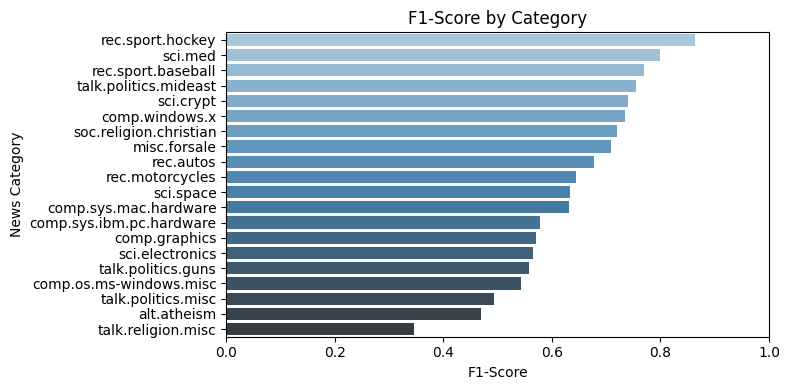

In [116]:
precision, recall, f1, support = precision_recall_fscore_support(
    all_labels, all_preds, labels=range(len(news_data.target_names))
)

df_report = pd.DataFrame({
    'Category': news_data.target_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

plt.figure(figsize=(8, 4))
df_plot = df_report.sort_values('F1-Score', ascending=False)

sns.barplot(x='F1-Score', y='Category', data=df_plot, palette='Blues_d')
plt.title('F1-Score by Category')
plt.xlabel('F1-Score')
plt.ylabel('News Category')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [117]:
target_names = news_data.target_names

# 예측 vs 정답
df_result = pd.DataFrame({
    'True Label': [target_names[y] for y in all_labels],
    'Predicted':  [target_names[y] for y in all_preds]
})

print(df_result.head(20))

                  True Label              Predicted
0         talk.politics.misc     talk.politics.misc
1               misc.forsale           misc.forsale
2                    sci.med                sci.med
3                    sci.med                sci.med
4            sci.electronics        sci.electronics
5                  sci.crypt              sci.crypt
6             comp.windows.x         comp.windows.x
7     soc.religion.christian     talk.religion.misc
8              comp.graphics          comp.graphics
9           rec.sport.hockey       rec.sport.hockey
10        rec.sport.baseball     rec.sport.baseball
11               alt.atheism            alt.atheism
12  comp.sys.ibm.pc.hardware  comp.sys.mac.hardware
13        rec.sport.baseball     talk.politics.misc
14        rec.sport.baseball     talk.politics.misc
15             comp.graphics          comp.graphics
16           rec.motorcycles        rec.motorcycles
17            comp.windows.x          comp.graphics
18     comp.

---

# ✔️ **5. GloVe**

GloVe 실험에서는 **사전학습된 GloVe 벡터(glove.6B.200d)**를 사용하였다. <br>
앞선 Word2vec나 FastText와 마찬가지로, 코드 구성이 유사해서 구체적인 설명은 생략한다.


### **GloVe 학습**

In [140]:
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"
glove_dir = "glove.6B"
glove_file = "glove.6B.200d.txt"
glove_txt_path = os.path.join(glove_dir, glove_file)
glove_dim = 200

# 다운로드
if not os.path.exists(glove_zip_path):
    print("glove.6B.zip 다운로드")
    urllib.request.urlretrieve(glove_url, glove_zip_path)

# 압축 해제
if not os.path.exists(glove_dir):
    print("glove.6B.zip 압축 해제")
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_dir)

# GloVe 로딩
glove_vectors = {}
with open(glove_txt_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

stanford 사이트에서 사전 학습된 glove.6B.200d를 다운받아 사용한다.

In [141]:
word2idx = {"<PAD>": 0, "<UNK>": 1}
embedding_matrix = [
    np.zeros(glove_dim),
    np.random.randn(glove_dim)
]

for word in set([w for doc in X_train for w in doc]):
    if word in glove_vectors:
        word2idx[word] = len(embedding_matrix)
        embedding_matrix.append(glove_vectors[word])

embedding_matrix = np.array(embedding_matrix)

### **데이터셋 클래스 정의**

In [142]:
class TextEmbeddingDataset(Dataset):
    def __init__(self, texts, labels, word2idx, max_len):
        self.texts = texts
        self.labels = labels
        self.word2idx = word2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = self.texts[idx]
        encoded = [self.word2idx.get(word, self.word2idx["<UNK>"]) for word in tokens]
        if len(encoded) < self.max_len:
            encoded += [self.word2idx["<PAD>"]] * (self.max_len - len(encoded))
        else:
            encoded = encoded[:self.max_len]
        return torch.tensor(encoded, dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

### **데이터로더 생성**

In [143]:
MAX_LEN = 280
BATCH_SIZE = 64

train_dataset = TextEmbeddingDataset(X_train, y_train, word2idx, MAX_LEN)
test_dataset = TextEmbeddingDataset(X_test, y_test, word2idx, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### **LSTM 모델 정의**

In [144]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, output_dim, num_layers, dropout):
        super(LSTMClassifier, self).__init__()

        vocab_size, embedding_dim = embedding_matrix.shape

        # 1. 임베딩 레이어
        self.embedding = nn.Embedding.from_pretrained(
            torch.tensor(embedding_matrix, dtype=torch.float).to(device),
            freeze=False
        )

        # 2. LSTM
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True,
            bidirectional=True
        )

        # 3. FC 레이어
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)

        # 양방향
        forward_hidden = hidden[-2]
        backward_hidden = hidden[-1]
        combined = torch.cat((forward_hidden, backward_hidden), dim=1)

        out = self.fc(combined)
        return out

In [145]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMClassifier(
    embedding_matrix=embedding_matrix,
    hidden_dim=128,
    output_dim=len(set(y_train)),
    num_layers=2,
    dropout=0.5
).to(device)

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_tensor = torch.FloatTensor(class_weights).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### **LSTM 모델 학습**

In [146]:
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f}")

[Epoch 1] Loss: 2.1530
[Epoch 2] Loss: 1.4474
[Epoch 3] Loss: 1.1134
[Epoch 4] Loss: 0.8752
[Epoch 5] Loss: 0.6995
[Epoch 6] Loss: 0.5211
[Epoch 7] Loss: 0.3753
[Epoch 8] Loss: 0.2788
[Epoch 9] Loss: 0.2048
[Epoch 10] Loss: 0.1619
[Epoch 11] Loss: 0.1270
[Epoch 12] Loss: 0.1124
[Epoch 13] Loss: 0.1168
[Epoch 14] Loss: 0.0851
[Epoch 15] Loss: 0.0755
[Epoch 16] Loss: 0.0596
[Epoch 17] Loss: 0.0534
[Epoch 18] Loss: 0.0612
[Epoch 19] Loss: 0.0953
[Epoch 20] Loss: 0.0674


### **LSTM 모델 평가**

In [147]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# 성능 평가
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47       148
           1       0.56      0.71      0.63       181
           2       0.67      0.61      0.64       185
           3       0.51      0.68      0.58       191
           4       0.82      0.58      0.68       187
           5       0.75      0.68      0.71       190
           6       0.78      0.64      0.70       189
           7       0.79      0.73      0.76       187
           8       0.68      0.74      0.71       195
           9       0.77      0.84      0.81       187
          10       0.93      0.88      0.90       185
          11       0.80      0.78      0.79       179
          12       0.57      0.72      0.63       190
          13       0.86      0.79      0.82       183
          14       0.79      0.69      0.74       180
          15       0.76      0.68      0.72       175
          16       0.64      0.51      0.57       166
          17       0.84    

Word2Vec, FastText와 비교했을 때, GloVe의 **전체 정확도는 68%**로 가장 좋은 성능을 보인다.<br>
특히 class 10, 13, 7 등 일부 주요 클래스에서 **precision/recall 모두 향상**되었다. <br><br>
class 19처럼 희귀 클래스에선 여전히 낮은 점수를 보이지만,<br>
**macro 평균이 높아졌기에** 전체적인 클래스 균형도 좋아졌다고 볼 수 있을 것이다. <br><br>

이는 GloVe가 대규모 말뭉치를 기반으로 **일반화된 표현을 사전학습**했기 때문이라고 해석할 수 있을 것이다.

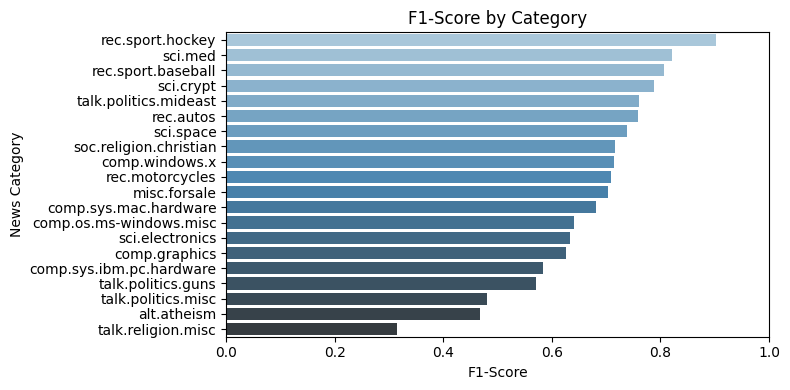

In [148]:
precision, recall, f1, support = precision_recall_fscore_support(
    all_labels, all_preds, labels=range(len(news_data.target_names))
)

df_report = pd.DataFrame({
    'Category': news_data.target_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

plt.figure(figsize=(8, 4))
df_plot = df_report.sort_values('F1-Score', ascending=False)

sns.barplot(x='F1-Score', y='Category', data=df_plot, palette='Blues_d')
plt.title('F1-Score by Category')
plt.xlabel('F1-Score')
plt.ylabel('News Category')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [149]:
target_names = news_data.target_names

# 예측 vs 정답
df_result = pd.DataFrame({
    'True Label': [target_names[y] for y in all_labels],
    'Predicted':  [target_names[y] for y in all_preds]
})

print(df_result.head(20))

                  True Label               Predicted
0         talk.politics.misc      talk.politics.misc
1               misc.forsale            misc.forsale
2                    sci.med                 sci.med
3                    sci.med                 sci.med
4            sci.electronics         sci.electronics
5                  sci.crypt               sci.crypt
6             comp.windows.x          comp.windows.x
7     soc.religion.christian  soc.religion.christian
8              comp.graphics           comp.graphics
9           rec.sport.hockey        rec.sport.hockey
10        rec.sport.baseball      rec.sport.baseball
11               alt.atheism             alt.atheism
12  comp.sys.ibm.pc.hardware         sci.electronics
13        rec.sport.baseball         sci.electronics
14        rec.sport.baseball      rec.sport.baseball
15             comp.graphics           comp.graphics
16           rec.motorcycles         rec.motorcycles
17            comp.windows.x          comp.win

---

# ✔️ **6. 결론**

본 프로젝트에서는 **Word2Vec, FastText, GloVe** 세 가지 임베딩 방식을 활용하여<br>
뉴스 카테고리 분류 모델을 구현하고 성능을 비교하였다.<br>
모든 실험에서 **동일한 BiLSTM 모델 구조와 전처리 방식**을 적용하였으며,<br>
클래스 불균형 문제를 고려해 **클래스 가중치**를 반영한 손실 함수를 사용하였다.<br><br>

실험 결과, GloVe 임베딩을 사용한 모델이 **정확도 68%로 가장 우수한 성능**을 보였고,<br>
Word2Vec과 FastText는 정확도 65%로 동일한 결과를 보였다.<br>
특히 GloVe는 macro 및 weighted F1-score에서도 가장 높은 수치를 기록하여<br>
클래스 간 **예측 성능의 균형** 면에서도 뛰어남을 확인할 수 있었다.<br><br>

결론적으로, 본 실험에서는 사전학습된 GloVe가 다른 방식보다 더 효과적으로 카테고리를 예측하며,<br>
뉴스 분류 문제에서 높은 성능을 보일 수 있음을 확인하였다.<br>
이는 GloVe가 대규모 말뭉치에서 **단어 간 동시 등장 확률을 기반으로 학습**되었기 때문에,<br>
보다 안정적이고 일반화된 의미 표현을 제공한 결과로 해석할 수 있을 것이다.

---